# Załadowanie danych

In [72]:
%config InlineBackend.figure_format = 'svg'

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt
from joblib import dump, load
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

# load data
x, y = load_wine(return_X_y=True, as_frame=True)

# Opis danych

In [73]:
x.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Normalizacja i podział danych, uczenie, raport, confusion_matrix

In [74]:
# normalize values to same range (0, 1)
scaler = MinMaxScaler() 
scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled)

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)

# sort values
x_test['y'] = y_test
x_test = x_test.sort_values(by=['y'])
y_test = x_test['y']
x_test = x_test.drop(columns=['y'])

# create classifier and learn it
try:
  clf = load('model_3.joblib')
except:
  clf = MLPClassifier()
  clf.fit(x_train, y_train)
  dump(clf, 'model_3.joblib')

# predict
y_predicted = clf.predict(x_test)

print(classification_report(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.98      0.98      0.98        43
           2       1.00      1.00      1.00        28

    accuracy                           0.98       107
   macro avg       0.98      0.98      0.98       107
weighted avg       0.98      0.98      0.98       107

[[35  1  0]
 [ 1 42  0]
 [ 0  0 28]]


# Ładniejszy confusion_matrix

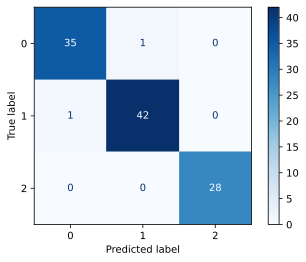

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap=plt.cm.Blues)
plt.show()

Wykres pomyłek

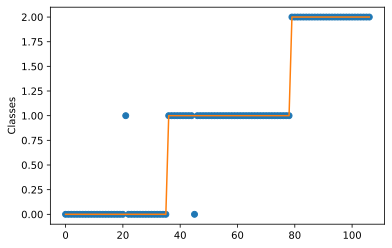

In [76]:
plt.plot(range(y_predicted.size), y_predicted, 'o')
plt.plot(range(y_test.size), y_test)

plt.xlabel("")
plt.ylabel("Classes")
plt.title("")

plt.show()

Text(0, 0.5, 'Accuracy score')

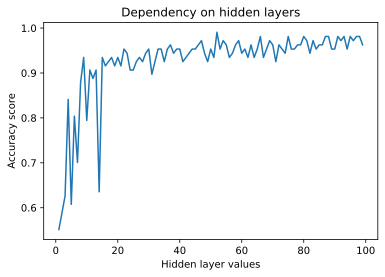

In [77]:
from warnings import filterwarnings
filterwarnings('ignore')

hidden_layers = range(1, 100, 1)
scores = []

for hidden_layer in hidden_layers:
  new_clf = MLPClassifier(hidden_layer_sizes=(hidden_layer, ))
  new_clf.fit(x_train, y_train)
  y_predicted = new_clf.predict(x_test)
  score = accuracy_score(y_test, y_predicted)
  scores.append(score)

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(hidden_layers, scores)
plt.title("Dependency on hidden layers")
plt.xlabel("Hidden layer values")
plt.ylabel("Accuracy score")

# Wizualizacja zbioru danych
 w zależności od wyboru kernela

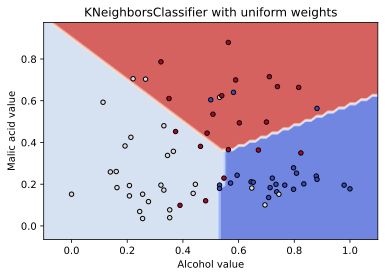

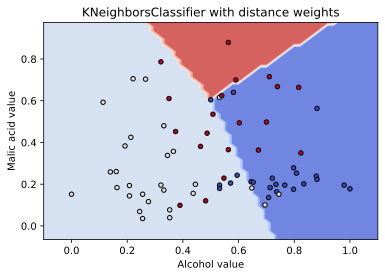

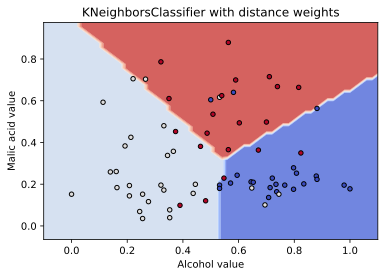

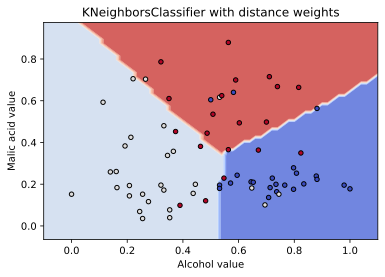

In [78]:
def make_meshgrid(x, y, step = 0.02):
  x_min, x_max = x.min() - 0.1, x.max() + 0.1
  y_min, y_max = y.min() - 0.1, y.max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  return xx, yy

def plot_contours(axis, clf, x, y, **params):
  Z = clf.predict(np.c_[x.ravel(), y.ravel()])
  Z = Z.reshape(x.shape)
  out = axis.contourf(x, y, Z, **params)
  return out


x_train_np = x_train.to_numpy()[:, :2]
y_train_np = y_train.to_numpy()

models = (
  MLPClassifier(activation="identity"),
  MLPClassifier(activation="logistic"),
  MLPClassifier(activation="tanh"),
  MLPClassifier(activation="relu"),
)

models = (clf.fit(x_train_np, y_train_np) for clf in models)

titles = (
  "KNeighborsClassifier with uniform weights",
  "KNeighborsClassifier with distance weights",
  "KNeighborsClassifier with distance weights",
  "KNeighborsClassifier with distance weights",
)

X0 = x_train_np[:, 0]
X1 = x_train_np[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
  fig, ax = plt.subplots()
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y_train_np, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  plt.title(title)
  plt.xlabel("Alcohol value")
  plt.ylabel("Malic acid value")

plt.show()


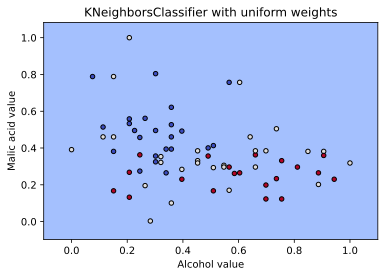

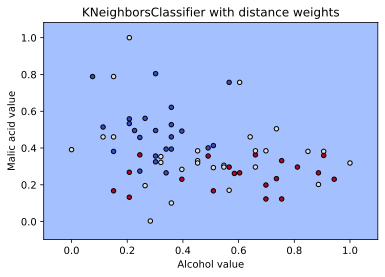

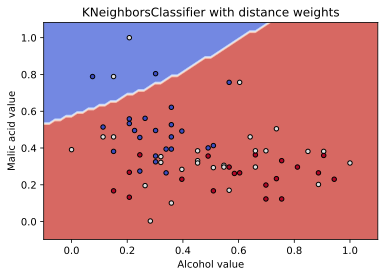

In [79]:
models = (
  MLPClassifier(learning_rate="constant", solver="sgd"),
  MLPClassifier(learning_rate="invscaling", solver="sgd"),
  MLPClassifier(learning_rate="adaptive", solver="sgd"),
)

x_train_np = x_train.to_numpy()[:,  7:9]
y_train_np = y_train.to_numpy()
models = (clf.fit(x_train_np, y_train_np) for clf in models)

titles = (
  "KNeighborsClassifier with uniform weights",
  "KNeighborsClassifier with distance weights",
  "KNeighborsClassifier with distance weights",
)


X0 = x_train_np[:, 0]
X1 = x_train_np[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
  fig, ax = plt.subplots()
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y_train_np, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  plt.title(title)
  plt.xlabel("Alcohol value")
  plt.ylabel("Malic acid value")

plt.show()


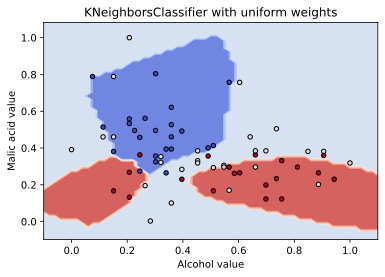

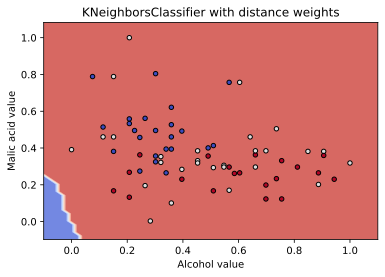

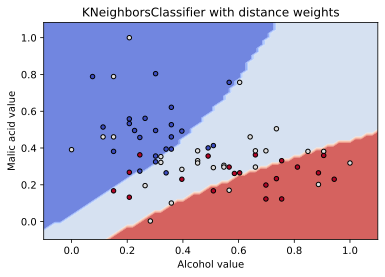

In [80]:
models = (
  MLPClassifier(solver="lbfgs"),
  MLPClassifier(solver="sgd"),
  MLPClassifier(solver="adam"),
)

x_train_np = x_train.to_numpy()[:,  7:9]
y_train_np = y_train.to_numpy()
models = (clf.fit(x_train_np, y_train_np) for clf in models)

titles = (
  "KNeighborsClassifier with uniform weights",
  "KNeighborsClassifier with distance weights",
  "KNeighborsClassifier with distance weights",
)


X0 = x_train_np[:, 0]
X1 = x_train_np[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title in zip(models, titles):
  fig, ax = plt.subplots()
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y_train_np, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  plt.title(title)
  plt.xlabel("Alcohol value")
  plt.ylabel("Malic acid value")

plt.show()


# Krzywa uczenia

/home/mbober/Documents/PWR_Algorytmy_uczenia_maszynowego/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mbober/Documents/PWR_Algorytmy_uczenia_maszynowego/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mbober/Documents/PWR_Algorytmy_uczenia_maszynowego/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mbober/Documents/PWR_Algorytmy_uczenia_maszynowego/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarn

<module 'matplotlib.pyplot' from '/home/mbober/Documents/PWR_Algorytmy_uczenia_maszynowego/venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

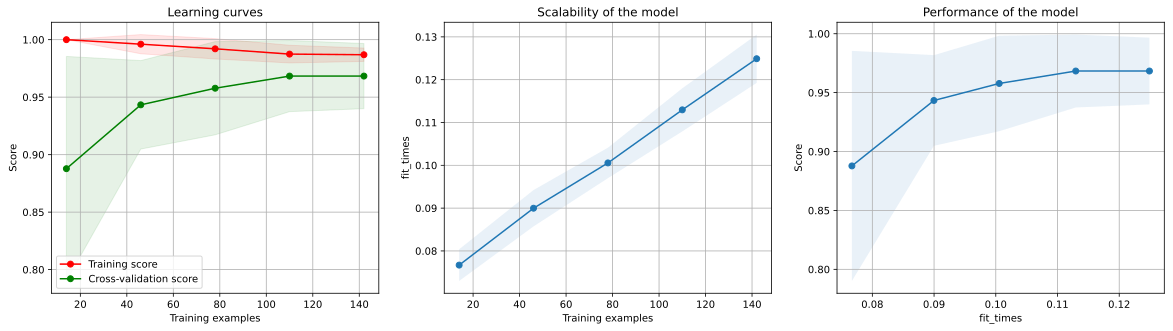

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)


plot_learning_curve(clf, 'Learning curves', x, y, cv=cv, n_jobs=4)